# Machine Learning & Statistics Project 2020

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

### Objectives:

Explore the Power production dataset

Explore models

Determine model to use

Develop web service

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np

In [17]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

# Apply the default seaborn settings.
sns.set()

#Set plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [18, 10]

In [18]:
# Import the power production dataset and view the data
data = pd.read_csv("powerproduction.csv")

pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [19]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The dataset file powerproduction.csv contains 500 observations with two variables speed and power. These variables are wind speed and wind turbine power output.

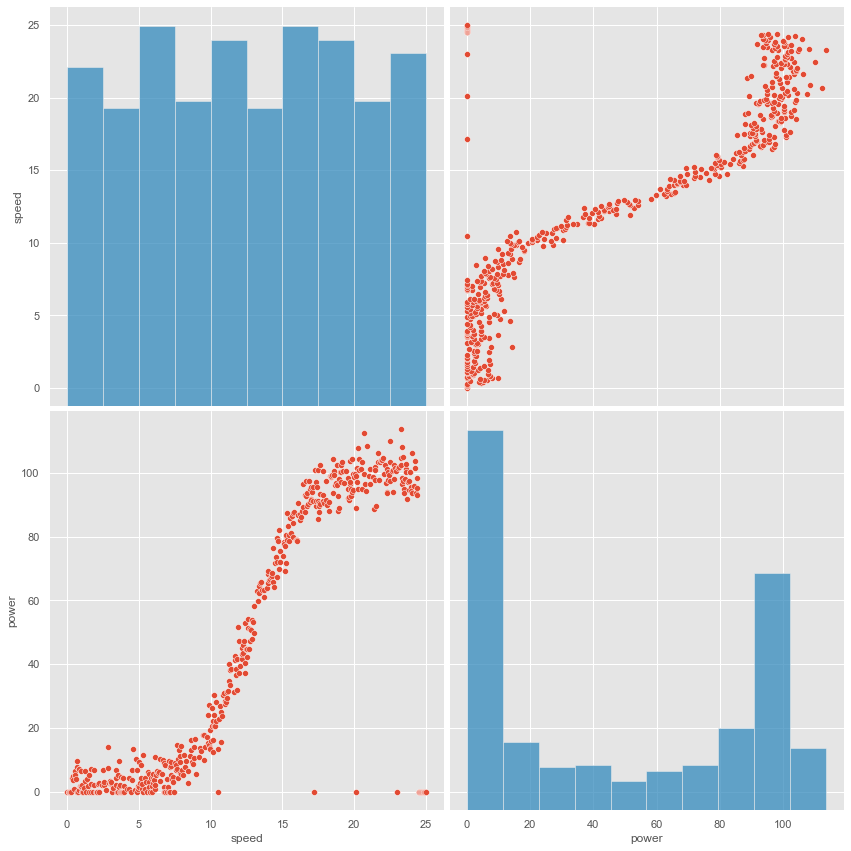

In [23]:
# Plot the data
sns.pairplot(data, height=6)

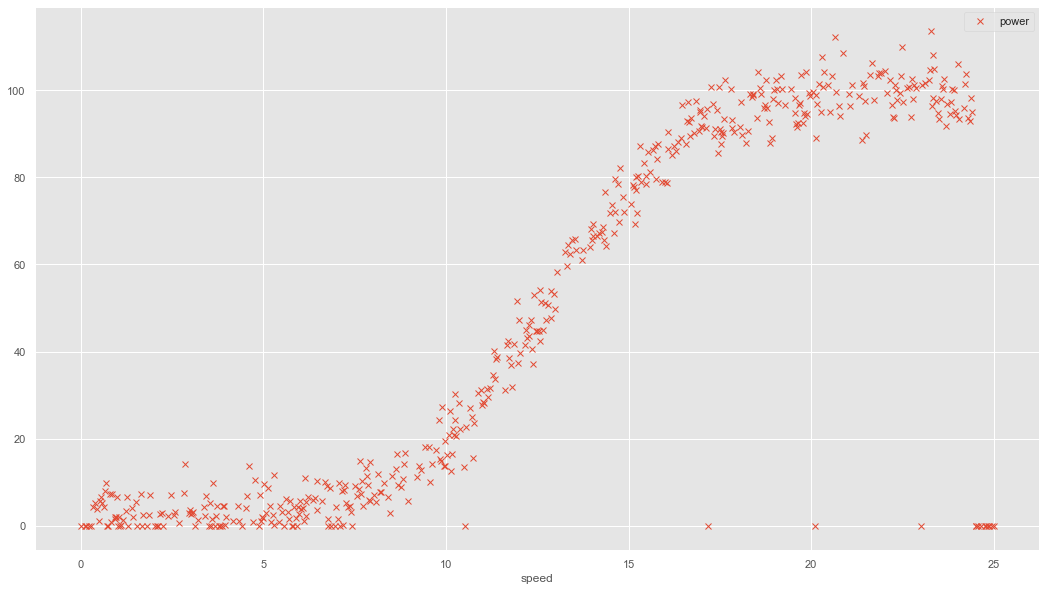

In [21]:
# Plot data
data.plot(x="speed", y="power", style="x")
plt.show()

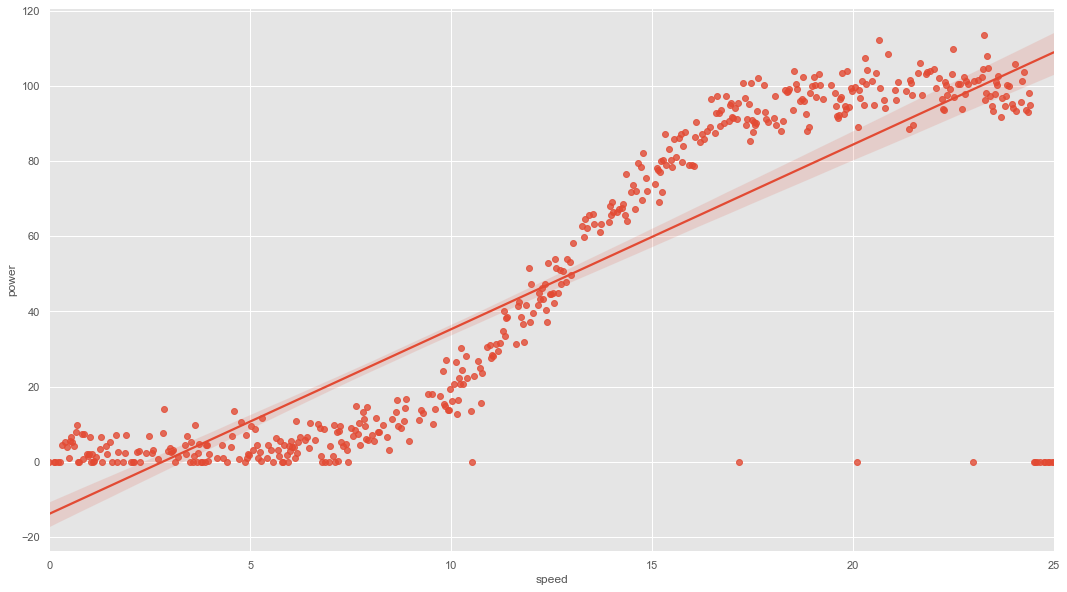

In [22]:
# Calculating line of best fit
sns.regplot(x="speed", y="power", data=data)

The straight line doesn't provide a great fit to the data. There is a clear s shaped curve displayed in the plot of the data above.  

### REMOVE DATA POINTS WITH ZERO POWER OUTPUT

In [25]:
# Remove zero values https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df = data[(data.power != 0)]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


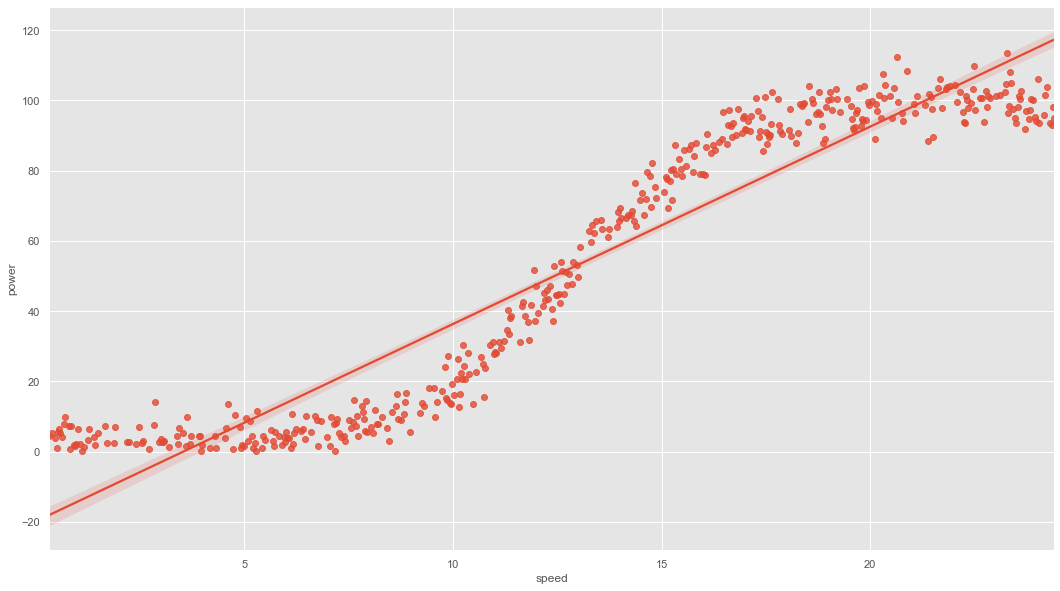

In [26]:
sns.regplot(x="speed", y="power", data=df)